In [12]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
import functions as pfunc
import h5py 

In [2]:
#stream from root file
root_path='/beegfs/desy/user/eren/SimpleCaloEDM4hep.root'
ntuple = uproot.open(root_path)['events/SimCalorimeterHits']
ntuple.keys()


[b'SimCalorimeterHits.cellID',
 b'SimCalorimeterHits.energy',
 b'SimCalorimeterHits.position.x',
 b'SimCalorimeterHits.position.y',
 b'SimCalorimeterHits.position.z',
 b'SimCalorimeterHits.contributions_begin',
 b'SimCalorimeterHits.contributions_end']

In [3]:
## Get the positions and energy [Jagged array]
x = ntuple['SimCalorimeterHits.position.x'].array()
y = ntuple['SimCalorimeterHits.position.y'].array()
z = ntuple['SimCalorimeterHits.position.z'].array()
e = ntuple['SimCalorimeterHits.energy'].array()

In [4]:
#z positions for the first event
z[0]

array([ 877.23114,  879.9085 ,  882.25116, ..., 1094.8274 , 1094.9087 ,
       1094.9896 ], dtype=float32)

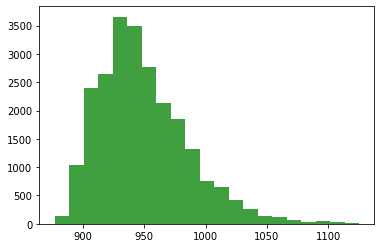

In [5]:
## z-positions for all events
nz, zbins, zpatches = plt.hist(z.flatten(), 21,  facecolor='g', alpha=0.75)
#xz, xbins, xpatches = plt.hist(x.flatten(), 100,  facecolor='g', alpha=0.75)

In [6]:
# Assume we're happy with zbinning = 21

binX = np.arange(-25, 26, 5.00)
binY = np.arange(-25, 26, 5.00)

## Temporary storage for numpy arrays (layer information)
l = []

for i in range(0, 10):
   
    fig, axs = plt.subplots(20, 1, figsize=(5, 75))

    layers = []
    for j in range(0,20):
        idx = np.where( (z[i] <= zbins[j+1]) & (z[i] >  zbins[j]) )
        xlayer = x[i].take(idx)[0]
        ylayer = y[i].take(idx)[0]
        elayer = e[i].take(idx)[0]

        ### GeV -- > MeV conversion for cell energies
        elayer = elayer * 1000.00

        ### 2d hist is need for energy weighted distributions
        h0 = axs[j].hist2d(xlayer, ylayer, bins=[binX, binY], weights=elayer, norm=LogNorm(), cmap=plt.cm.jet)

        layers.append(h0[0])

    ## accumulate for each event
    l.append(layers)
    plt.close(fig)

layers = np.asarray(l)




In [7]:
layers.shape

(10, 20, 10, 10)

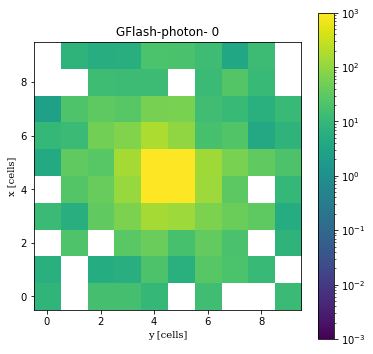

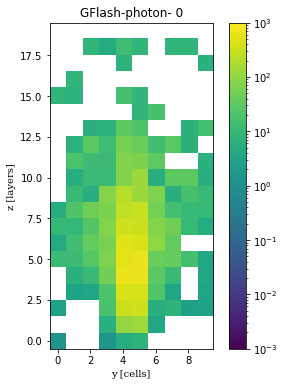

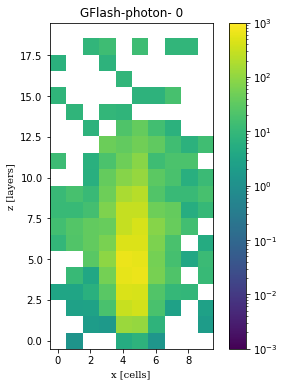

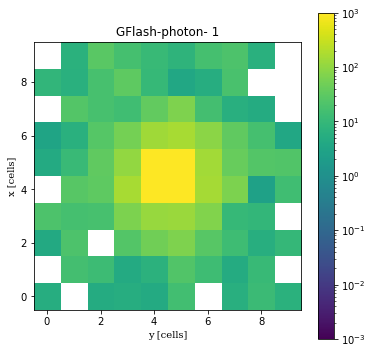

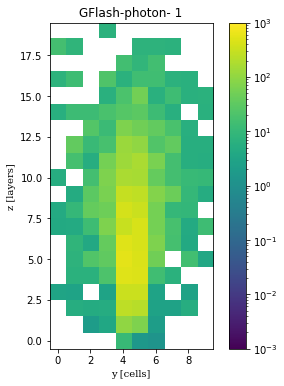

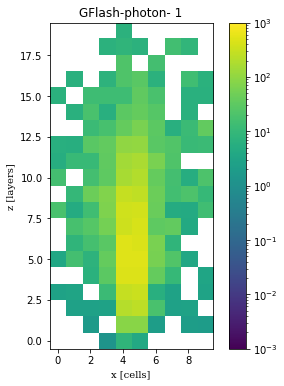

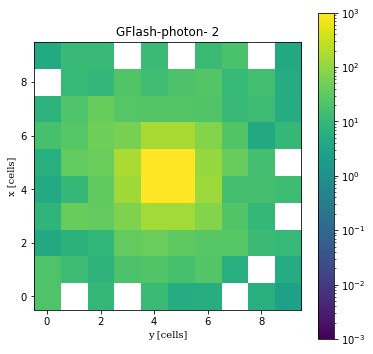

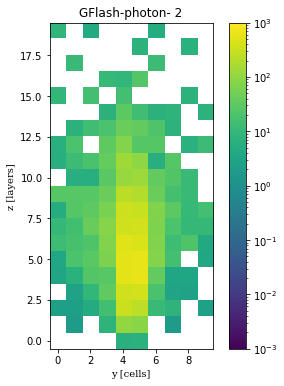

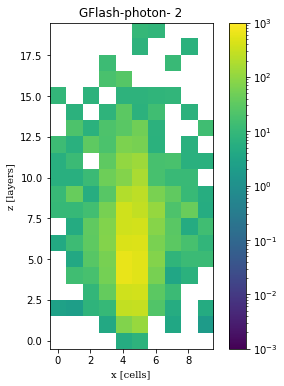

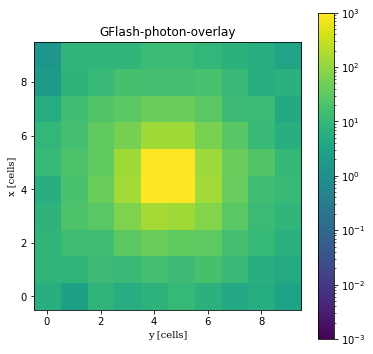

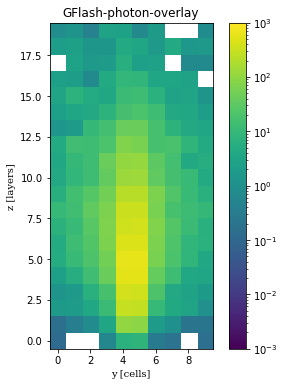

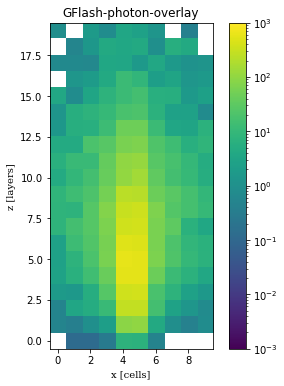

In [8]:
pfunc.plt_ExampleImage(layers, model_title='GFlash-photon-', save_title='Shower_GFlash', draw_3D=False, n=3)

In [13]:
#Open HDF5 file for writing
hf = h5py.File('gflash10x10.hdf5', 'w')
grp = hf.create_group("20x10x10")

## write to hdf5 files
grp.create_dataset('calo', data=layers)

<HDF5 dataset "calo": shape (10, 20, 10, 10), type "<f8">